# Lab1: Linear Regression and Gradient Descent

## Step1: Import and devide dataset.
- feature matrix needs to be transformed from sparse matrix to dense matrix using .todense() function.
- targets need to be transformed to n*1 shape. 

In [5]:
from numpy import *
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file

features, labels = load_svmlight_file("housing_scale")

train_features, test_features, train_targets, test_targets = train_test_split(features, labels, test_size=0.33)

train_features = train_features.todense()
test_features = test_features.todense()

train_targets =  train_targets.reshape(train_targets.shape[0],1)
test_targets =  test_targets.reshape(test_targets.shape[0],1)

## Step2：Initialize linear model parameters.
- theta is a n*1 matrix, otherwise there will be a number of errors during matrix operation.
- alpha, representing learning rate, should be small enough.

In [6]:
import numpy as np

m, n = np.shape(train_features)
theta = np.ones((n, 1))
alpha = 0.00005
maxIteration = 1000


## Step3: Choose loss function and calculate loss

In [7]:
def cal_loss(x,y,theta):
    return (1/2 *(np.linalg.norm(x*theta-y))**2)/ (x.shape[0])
    
train_loss = []
evaluation_loss = []


## Step4: Bath gradient descent function

In [8]:
for i in range(0, maxIteration):
    gradient =2* train_features.T * (train_features * theta - train_targets)
#     print(gradient)
    theta = theta - alpha * gradient
#     print(theta)
    train_loss.append(cal_loss(train_features,train_targets,theta))
    evaluation_loss.append(cal_loss(test_features,test_targets,theta))
    

## Step5: Draw graph
- The blue line represents the loss of train, and the orange line represents the loss of eva

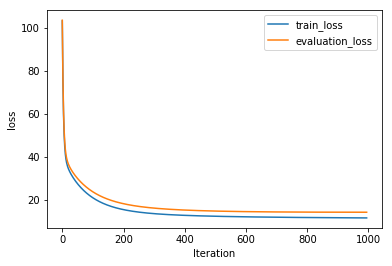

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("Iteration")
plt.ylabel("loss")

plt.plot(train_loss[5:], label="train_loss")
plt.plot(evaluation_loss[5:],label="evaluation_loss" )
plt.legend(loc='upper right')